In [16]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.attack import *
from src.create import *
from src.measure import *
import networkx as nx
import powerlaw
import pandas as pd
import matplotlib.pyplot as plt

# SF Power Law

In [23]:
n=4000
g=3
k=4
SFn_b = networkSF_w_3Dpos_PowerL(n,g,k,2)
filepath = "../data/pickle/SF/SFn"+str(n)+"_"+str(int(g*10))+"_k"+str(int(k))+"_b.gpickle"
nx.write_gpickle(SFn_b, filepath)

In [22]:
N = 1000
gamma = [2.7,2.8,2.9,3.0]
avgdegree = 4


cond1, cond2, cond3 = False, False, False

i = 0

for g in gamma:
    xmin = (g-2)*avgdegree/(g-1)
    smin_list = []
    savg_list = []
    smax_list = []
    for t in range(1000):
        
        s = powerlaw.Power_Law(xmin=xmin, parameters=[g], discrete=True).generate_random(N).astype(int)
        smin_list.append(min(s))
        savg_list.append(sum(s)/len(s))
        smax_list.append(max(s))
    print("%f min / max / average" %(g))
    print(min(smin_list),max(smax_list),sum(savg_list)/len(savg_list))

    
        

2.700000 min / max / average
2 43584 3.329228859999999
2.800000 min / max / average
2 143943 3.375153120000004
2.900000 min / max / average
2 17698 3.4123231799999973
3.000000 min / max / average
2 9483 3.4517670599999946


In [3]:
n = 2000
g = 2.5
k = 4

print("\n++++++++++++++++++++++++++++++")
print("SF N%d gamma %f <k> = %f Graph Generate..." %(n,g,k))
print("++++++++++++++++++++++++++++++\n")

SFn_a, conds, G_avg_k_list_23= networkSF_w_3Dpos_PowerL(n,g,k,1)
# filepath = "../data/pickle/SF/SFn"+str(n)+"_"+str(int(g*10))+"_k"+str(int(k))+"_a.gpickle"
# nx.write_gpickle(SFn_a, filepath)
print("SF N%d gamma %f <k> = %f A Graph Done..." %(n,g,k))
# print(filepath+"\n")

n = 2000
g = 3
k = 4

print("\n++++++++++++++++++++++++++++++")
print("SF N%d gamma %f <k> = %f Graph Generate..." %(n,g,k))
print("++++++++++++++++++++++++++++++\n")

SFn_a, conds, G_avg_k_list_27= networkSF_w_3Dpos_PowerL(n,g,k,1)
# filepath = "../data/pickle/SF/SFn"+str(n)+"_"+str(int(g*10))+"_k"+str(int(k))+"_a.gpickle"
# nx.write_gpickle(SFn_a, filepath)
print("SF N%d gamma %f <k> = %f A Graph Done..." %(n,g,k))
# print(filepath+"\n")

n = 2000
g = 5
k = 4

print("\n++++++++++++++++++++++++++++++")
print("SF N%d gamma %f <k> = %f Graph Generate..." %(n,g,k))
print("++++++++++++++++++++++++++++++\n")

SFn_a, conds, G_avg_k_list_30= networkSF_w_3Dpos_PowerL(n,g,k,1)
# filepath = "../data/pickle/SF/SFn"+str(n)+"_"+str(int(g*10))+"_k"+str(int(k))+"_a.gpickle"
# nx.write_gpickle(SFn_a, filepath)
print("SF N%d gamma %f <k> = %f A Graph Done..." %(n,g,k))
# print(filepath+"\n")


++++++++++++++++++++++++++++++
SF N2000 gamma 2.500000 <k> = 4.000000 Graph Generate...
++++++++++++++++++++++++++++++

Generate Scale-Free Network based on given powerLaw parameters & avg. degree 
(iter: 1000. Last gamma:2.548595. avg. degree: 2.912000)
SF N2000 gamma 2.500000 <k> = 4.000000 A Graph Done...

++++++++++++++++++++++++++++++
SF N2000 gamma 3.000000 <k> = 4.000000 Graph Generate...
++++++++++++++++++++++++++++++

Generate Scale-Free Network based on given powerLaw parameters & avg. degree 
(iter: 1000. Last gamma:3.170397. avg. degree: 3.391000)
SF N2000 gamma 3.000000 <k> = 4.000000 A Graph Done...

++++++++++++++++++++++++++++++
SF N2000 gamma 5.000000 <k> = 4.000000 Graph Generate...
++++++++++++++++++++++++++++++

Generate Scale-Free Network based on given powerLaw parameters & avg. degree 
(iter: 1000. Last gamma:5.237216. avg. degree: 3.759000)
SF N2000 gamma 5.000000 <k> = 4.000000 A Graph Done...


In [4]:
# n=1000, discrete = True
# 23: 1.981338775510204
# 27: 3.2423354037267083
# 30: 3.422430830039526

# n=2000, discrete = True
# 2.033028925619835
# 3.277716904276986
# 3.432220238095238

# n=2000, discrete = False
# 2.7931015452538634
# 3.340648330058939
# 3.544368


arr = np.array(G_avg_k_list_23)
print(np.average(arr))
arr = np.array(G_avg_k_list_27)
print(np.average(arr))
arr = np.array(G_avg_k_list_30)
print(np.average(arr))

2.8650855397148676
3.4302965931863723
3.7696301652892563


In [20]:
avgdegree = 4
for alpha in [2.5,3,5]:
    xmin = (alpha-2)*avgdegree/(alpha-1)
    print(xmin)


1.3333333333333333
2.0
3.0


In [4]:
df = pd.DataFrame(conds)
arr = np.array(G_avg_k_list)
print(np.average(arr))

1.9956715789473682


In [6]:
print(df[0].value_counts())
print(df[1].value_counts())
print(df[2].value_counts())
print(df[3].value_counts())

False    535
True     465
Name: 0, dtype: int64
False    1000
Name: 1, dtype: int64
False    936
True      64
Name: 2, dtype: int64
False    1000
Name: 3, dtype: int64


In [ ]:
ps, p_inf = generate_pinf_SF(N,g,t=20,true,[])

In [15]:
n = 1000
g_list = [2.8,2.9,3.0]
k = 4

for g in g_list:
    file_a = "../data/pickle/SF/SFn"+str(n)+"_"+str(int(g*10))+"_k"+str(int(k))+"_a.gpickle"
    file_b = "../data/pickle/SF/SFn"+str(n)+"_"+str(int(g*10))+"_k"+str(int(k))+"_b.gpickle"

    # file_a = "../data/pickle/SF/No_avgk_setup/SFn"+str(n)+"_"+str(int(g*10))+"_a.gpickle"
    # file_b = "../data/pickle/SF/No_avgk_setup/SFn"+str(n)+"_"+str(int(g*10))+"_b.gpickle"

    g1 = nx.read_gpickle(file_a)
    g2 = nx.read_gpickle(file_b)

    g1_k = dict(nx.degree(g1))
    g2_k = dict(nx.degree(g2))
    g1_k_list = [g1_k[key] for key in g1_k.keys()]
    g2_k_list = [g2_k[key] for key in g2_k.keys()]
    print(min(g1_k_list), max(g1_k_list), min(g2_k_list), max(g2_k_list))

    gamma_real_1 = SF_powerlaw_exp(g1)
    gamma_real_2 = SF_powerlaw_exp(g2)

    print("gamma1: ", gamma_real_1, "gamma2: ",gamma_real_2)

    G_nodes = len(g1.nodes())
    G_sum_k = np.sum([g1.degree()[i] for i in g1.nodes()])
    G_avg_k1 = G_sum_k / G_nodes

    G_nodes = len(g2.nodes())
    G_sum_k = np.sum([g2.degree()[i] for i in g2.nodes()])
    G_avg_k2 = G_sum_k / G_nodes
    print("k1: ", G_avg_k1, "k2: ",G_avg_k2)


1 287 0 308
gamma1:  2.8408713157786685 gamma2:  2.824898035700517
k1:  3.896 k2:  3.942
1 281 1 217
gamma1:  2.921793825356004 gamma2:  2.917396330906829
k1:  3.896 k2:  3.918
1 273 0 509
gamma1:  2.953178405118803 gamma2:  3.042608309948723
k1:  3.952 k2:  3.88


# RANDOM NETWORK

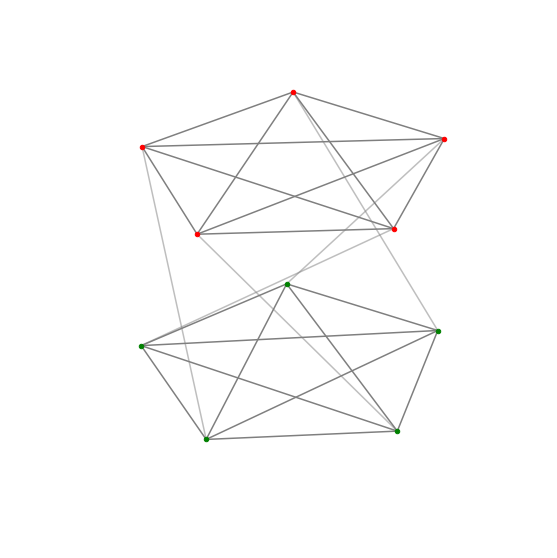

In [8]:
ER_a = networkER_w_3Dpos(5,5,1)
ER_b = networkER_w_3Dpos(5,5,2)

intd_ER = intd_random_net(ER_a,ER_b)
a = intd_ER.nodes()
intdNetworkDraw(intd_ER)
# numb = intd_ER.nodes['a-1']['num']

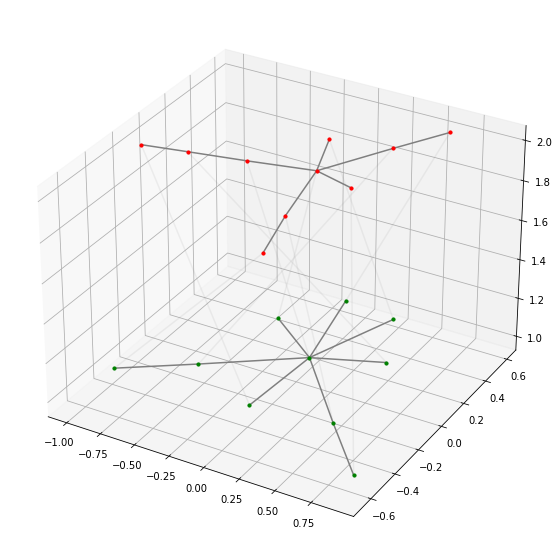

In [9]:
BA_a = networkSF_w_3Dpos_BA(10,1,1)
BA_b = networkSF_w_3Dpos_BA(10,1,2)

intd_BA = intd_random_net(BA_a,BA_b)

intdNetworkDraw(intd_BA,10)

# Legacy Test

In [ ]:
print("\n++++++++++++++++++++++++++++++")
print("SF N50000 gamma 3.0 <k> = 4 Graph Generte...")
print("++++++++++++++++++++++++++++++\n")

start = datetime.now()
SFn50000_30_a = networkSF_w_3Dpos_PowerL(50000,3.0,4,1)
nx.write_gpickle(SFn50000_30_a, "../data/pickle/SF/SFn50000_30_a.gpickle")
time = datetime.now() - start
print("...SFn50000_30_a Graph Generate Done!", time)

start = datetime.now()
SFn50000_30_b = networkSF_w_3Dpos_PowerL(50000,3.0,4,2)
nx.write_gpickle(SFn50000_30_b, "../data/pickle/SF/SFn50000_30_b.gpickle")
time = datetime.now() - start
print("...SFn50000_30_b Graph Generate Done!", time)

In [ ]:
cond1, cond2 = False, False
gamma = 2.7
thr_xmean = 4
xmin = (gamma-2)*thr_xmean/(gamma-1)
print(xmin)
i = 0
while not(cond1 and cond2):
    s = powerlaw.Power_Law(xmin=xmin, parameters=[gamma], discrete=True).generate_random(100000)
    fit = powerlaw.Fit(s, discrete=True, verbose=False)
    alpha = fit.power_law.alpha
    cond1 = gamma == round(alpha, 1)
    xmean = sum(s)/len(s)
    cond2 = thr_xmean == round(xmean,0)
    print(gamma, alpha, thr_xmean, xmean)
i += 1

print(i)

# print(s)
print("theoritical data: ", gamma, thr_xmean)
print("data: ", alpha, sum(s)/len(s))

In [ ]:
SFn2000_25_a = networkSF_w_3Dpos_PowerL(2000,2.5,1)
SFn2000_25_b = networkSF_w_3Dpos_PowerL(2000,2.5,2)

int_SFn2000_25 = intd_random_net(SFn2000_25_a,SFn2000_25_b)


In [14]:
SFn2000_27_a = networkSF_w_3Dpos_PowerL(2000,2.7,1)
SFn2000_27_b = networkSF_w_3Dpos_PowerL(2000,2.7,2)

int_SFn2000_27 = intd_random_net(SFn2000_27_a,SFn2000_27_b)


Generate Scale-Free Network based on given powerLaw parameters
(iter: 4339. Last gamma:2.719282)
Generate Scale-Free Network based on given powerLaw parameters
(iter: 43699. Last gamma:2.690704)


In [13]:
SFn2000_30_a = networkSF_w_3Dpos_PowerL(2000,3,1)
SFn2000_30_b = networkSF_w_3Dpos_PowerL(2000,3,2)

int_SFn2000_30 = intd_random_net(SFn2000_30_a,SFn2000_30_b)

# intdNetworkDraw(int_SFn2000_30,10)

Generate Scale-Free Network based on given powerLaw parameters
(iter: 1355. Last gamma:2.954070)
Generate Scale-Free Network based on given powerLaw parameters
(iter: 337. Last gamma:2.973497)


In [15]:
nx.write_gpickle(SFn2000_27_a, "../data/pickle/SF/SFn2000_27_a.gpickle")
nx.write_gpickle(SFn2000_27_b, "../data/pickle/SF/SFn2000_27_b.gpickle")
nx.write_gpickle(int_SFn2000_27, "../data/pickle/SF/int_SFn2000_27.gpickle")
nx.write_gpickle(SFn2000_30_a, "../data/pickle/SF/SFn2000_30_a.gpickle")
nx.write_gpickle(SFn2000_30_b, "../data/pickle/SF/SFn2000_30_b.gpickle")
nx.write_gpickle(int_SFn2000_30, "../data/pickle/SF/int_SFn2000_30.gpickle")


In [3]:
SFn2000_25 = np.loadtxt('./results/1012/SFn2000_25.csv',delimiter=",")
SFn2000_27 = np.loadtxt('./results/1012/SFn2000_27.csv',delimiter=",")
SFn2000_30 = np.loadtxt('./results/1012/SFn2000_30.csv',delimiter=",")

# # a.head()
# p = df_SF25.loc[0,:]
# p_inf = df_SF25.loc[1,:]
# a = zip(p,p_inf)
# print(a)
# # plt.plot(a.loc(0,:))

In [22]:
# G = nx.read_gpickle("../data/pickle/SF/SFn2000_25_a.gpickle")

# G_degrees = [dict(G.degree())[key] for key in dict(G.degree()).keys()]
# G_avgDegree = np.average(G_degrees)
# print("Lamda 2.5:", G_avgDegree)


G = nx.read_gpickle("../data/pickle/SF/SFn2000_27_a.gpickle")

G_degrees = [dict(G.degree())[key] for key in dict(G.degree()).keys()]
G_avgDegree = np.average(G_degrees)
print("Lamda 2.7:", G_avgDegree)


G = nx.read_gpickle("../data/pickle/SF/SFn2000_30_a.gpickle")

G_degrees = [dict(G.degree())[key] for key in dict(G.degree()).keys()]
G_avgDegree = np.average(G_degrees)
print("Lamda 3.0:", G_avgDegree)

Lamda 2.7: 3.98
Lamda 3.0: 3.409


In [7]:
plot_pinf([SFn2000_30, SFn2000_27, SFn2000_25], 4, ["SF, lamda=3", "SF, lamda=2.7", "SF, lamda=2.5"], path="../notebooks/figure/SFpinf_25_27_30.png", p_theory=False)


TypeError: 'NoneType' object is not subscriptable

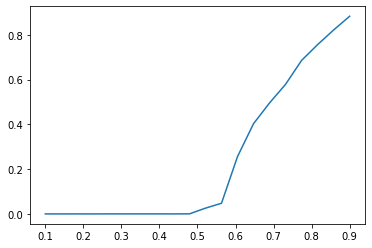

In [33]:
plt.plot(p, p_inf)